Data Scientist Workshop - ex.10.2 - Adam Trentowski, 162602

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
from matplotlib.colors import ListedColormap

## Data load and split

In [2]:
df = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_10/files/VLagun_Total_Basins_DT.csv')

In [3]:
df.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.9298,0.9251,0.0000,0.0025,0.0257,1.3152,0.8920,0.2714,0.0000,Eastern
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0378,0.0000,0.0000,0.0000,0.0000,0.0769,0.0640,0.0464,0.0000,Eastern
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,0.0000,0.0000,0.0093,0.0138,0.0006,0.0466,0.0120,0.0044,0.0000,Eastern
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,0.0000,0.0129,0.0060,0.0140,0.0155,0.0313,0.0079,0.0040,0.0000,Eastern
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,0.0000,0.0141,0.0000,0.0093,0.0007,0.0491,0.0143,0.0019,0.0026,Eastern


In [4]:
df.Basin = [1 if i == 'Western' else 0 for i in df.Basin]

In [5]:
df.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Basin
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.9298,0.9251,0.0000,0.0025,0.0257,1.3152,0.8920,0.2714,0.0000,0
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0378,0.0000,0.0000,0.0000,0.0000,0.0769,0.0640,0.0464,0.0000,0
2,3.721493,9.63,17.5,62.0,11.7,13.0,117.6,0.036,0.021,0.727,...,0.0000,0.0000,0.0093,0.0138,0.0006,0.0466,0.0120,0.0044,0.0000,0
3,4.407982,9.54,18.4,55.0,7.4,16.2,124.7,0.023,0.024,0.566,...,0.0000,0.0129,0.0060,0.0140,0.0155,0.0313,0.0079,0.0040,0.0000,0
4,4.389916,9.34,17.8,53.0,13.8,21.4,84.4,0.031,0.030,0.022,...,0.0000,0.0141,0.0000,0.0093,0.0007,0.0491,0.0143,0.0019,0.0026,0


In [6]:
X = df.drop('Basin', axis=1)
y = df['Basin']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Training data points: {X_train.shape[0]}')
print(f'Testing data points: {X_test.shape[0]}')
print(f'Class: {np.unique(y)}')

Training data points: 108
Testing data points: 47
Class: [0 1]


## Tree

In [8]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(f'Misclassified samples: {(y_test != y_pred).sum()}')
print(f'Test dataset accuracy (tree): {(y_test == y_pred).sum() / y_test.shape[0]:.2f}%')

Misclassified samples: 13
Test dataset accuracy (tree): 0.72%


In [9]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=0)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)

print(f'Misclassified samples: {(y_train != y_pred).sum()}')
print(f'Train dataset accuracy (tree): {(y_train == y_pred).sum() / y_train.shape[0]:.2f}%')

Misclassified samples: 21
Train dataset accuracy (tree): 0.81%


In [10]:
export_graphviz(tree, out_file='tree_2.dot', feature_names=X.columns.values)

![Tree graph](tree_2.png)


## Forest

In [11]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=2,
                       random_state=1)

In [12]:
y_pred = forest.predict(X_test)
print(f'Test dataset accuracy (forest): {accuracy_score(y_test, y_pred):.4f}%')

Test dataset accuracy (forest): 0.7660%


In [13]:
y_pred = forest.predict(X_train)
print(f'Train dataset accuracy (forest): {accuracy_score(y_train, y_pred):.4f}%')

Train dataset accuracy (forest): 1.0000%


## Feature Importances

In [15]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 34,
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

 1) Nauplii Cyclopoida                 0.087723
 2) Cyclops sp.                        0.072056
 3) Depth                              0.068339
 4) DON                                0.053796
 5) PSU                                0.042186
 6) DOP                                0.037714
 7) O2                                 0.036068
 8) DOC                                0.035916
 9) Cyanobacteria                      0.031511
10) Acartia tonsa                      0.029091
11) TN/TP                              0.027812
12) Keratella cochlearis cochlearis    0.027801
13) temp.                              0.027305
14) SS                                 0.026483
15) PP                                 0.024106
16) SRP                                0.023878
17) PN                                 0.023749
18) Diatomophyceae                     0.023105
19) Chlorophyceae                      0.022410
20) picophytoplankton                  0.021967
21) Keratella cochlearis f.tecta       0

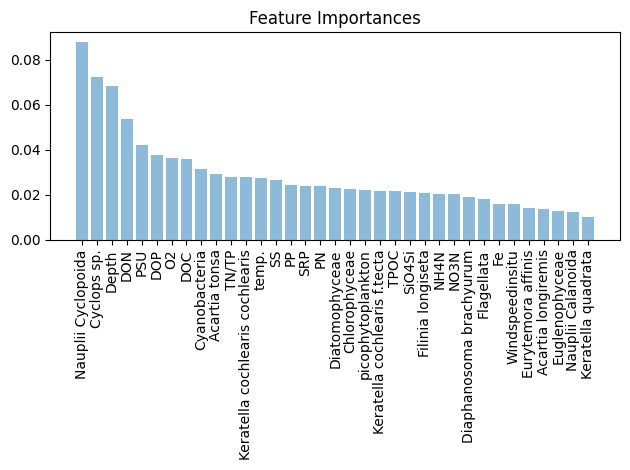

In [16]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]),
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

## Distribution in 2 most important features
### Nauplii Cyclopoida and Cyclops sp.

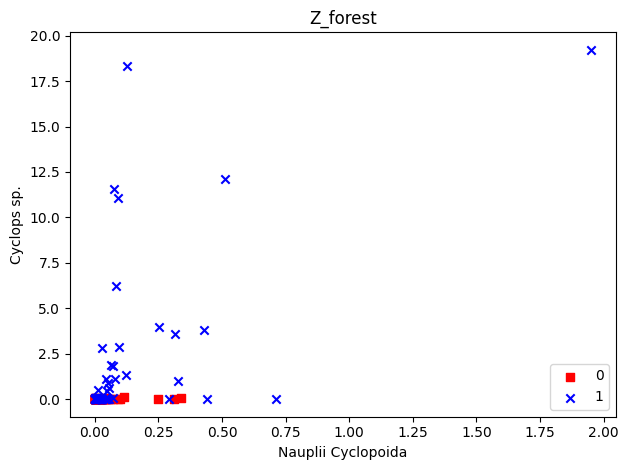

In [17]:
Z_forest = X[['Nauplii Cyclopoida', 'Cyclops sp.']].values

colors = ['r', 'b', 'g', 'k']
markers = ['s', 'x', 'o', '^']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_forest[y.values == l, 0],
                Z_forest[y.values == l, 1],
                c=c, label=l, marker=m)
    
plt.title('Z_forest')
plt.xlabel('Nauplii Cyclopoida')
plt.ylabel('Cyclops sp.')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Test and train accuracy
### Tree_forest

In [18]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_test)
print(f'Test dataset accuracy (tree_forest): {accuracy_score(y_forest_test, y_forest_pred):.2f}%')

Test dataset accuracy (tree_forest): 0.68%


In [19]:
Z_forest_train, Z_forest_test, y_forest_train, y_forest_test = train_test_split(Z_forest, y, test_size=0.3, random_state=0)

tree_forest = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=0)
tree_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = tree_forest.predict(Z_forest_train)
print(f'Train dataset accuracy (tree_forest): {accuracy_score(y_forest_train, y_forest_pred):.2f}%')

Train dataset accuracy (tree_forest): 0.80%


## Feature Selection

In [20]:
sfm = SelectFromModel(forest, threshold=0.05, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 26,
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

 1) Nauplii Cyclopoida         0.087723
 2) Cyclops sp.                0.072056
 3) Depth                      0.068339
 4) DON                        0.053796


D:\Projekty\DataScientistWorkshop\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Test and train accuracy
### Forest_forest

In [21]:
# train a random forest based on Z_forest

forest_forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)

forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_test)
print(f'Test dataset accuracy (forest_forest): {accuracy_score(y_forest_test, y_forest_pred):.2f}%')

Test dataset accuracy (forest_forest): 0.72%


In [22]:
forest_forest = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=1, n_jobs=2)

forest_forest.fit(Z_forest_train, y_forest_train)

y_forest_pred = forest_forest.predict(Z_forest_train)
print(f'Train dataset accuracy (forest_forest): {accuracy_score(y_forest_train, y_forest_pred):.2f}%')

Train dataset accuracy (forest_forest): 0.98%


## Visualization

In [23]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v',)
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y == cl, 0],
            y = X[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],  # prevents warning
            marker=markers[idx],
            label=cl
        )
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='c',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set', edgecolors='k')

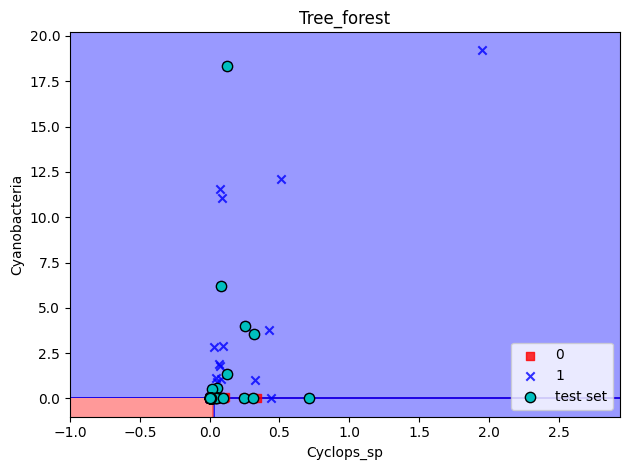

In [24]:
# plot boundaries of tree_forest

Z_forest_combined = np.vstack((Z_forest_train, Z_forest_test))
y_forest_combined = np.hstack((y_forest_train, y_forest_test))
plot_decision_regions(
    Z_forest_combined,
    y_forest_combined,
    classifier=tree_forest,
    test_idx=range(
        y_forest_train.shape[0],
        y_forest_train.shape[0] + y_forest_test.shape[0]
    )
)

plt.title('Tree_forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

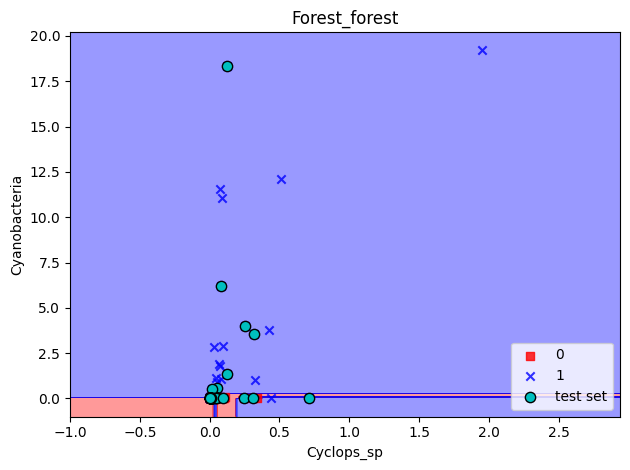

In [25]:
plot_decision_regions(
    Z_forest_combined,
    y_forest_combined,
    classifier=forest_forest,
    test_idx=range(
        y_forest_train.shape[0],
        y_forest_train.shape[0] + y_forest_test.shape[0]
    )
)

plt.title('Forest_forest')
plt.xlabel('Cyclops_sp')
plt.ylabel('Cyanobacteria')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()